In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('titanic_test.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin'], axis=1, inplace=True)

In [5]:
df

,Survived,Pclass,Sex,Age,Embarked
0,0,3,male,22.0,S
1,1,1,female,38.0,C
2,1,3,female,26.0,S
3,1,1,female,35.0,S
4,0,3,male,35.0,S
...,...,...,...,...,...
886,0,2,male,27.0,S
887,1,1,female,19.0,S
888,0,3,female,NaN,S
889,1,1,male,26.0,C


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   Embarked  889 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 34.9+ KB


In [7]:
df.Embarked.mode()

0    S
Name: Embarked, dtype: object

In [8]:
df.Embarked.fillna(df.Embarked.mode()[0], inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   Embarked  891 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 34.9+ KB


In [10]:
891-714

177

In [11]:
177/891*100

19.865319865319865

In [12]:
df.Age.mean()

29.69911764705882

In [13]:
df.Age.median()

28.0

In [14]:
df.Age.fillna(df.Age.mean(), inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   Embarked  891 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 34.9+ KB


In [16]:
df.Age = df.Age.apply(lambda x : round(x,2))

In [17]:
df.Survived.unique()

array([0, 1])

In [18]:
from matplotlib import pyplot as plt

In [19]:
male_survived = (df.Survived == 1) & (df.Sex == 'male')

In [20]:
sum(male_survived)

109

In [21]:
female_survived = (df.Survived == 1) & (df.Sex == 'female')

In [22]:
sum(female_survived)

233

In [23]:
female_dead = (df.Survived == 0) & (df.Sex == 'female')

In [24]:
sum(female_dead)

81

In [25]:
male_dead = (df.Survived == 0) & (df.Sex == 'male')

In [26]:
sum(male_dead)

468

Text(0.5, 1.0, 'Gender vs Survival Rate')

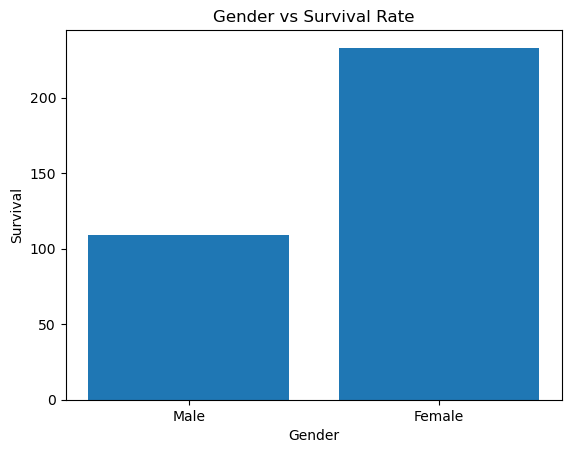

In [27]:
plt.bar(['Male', 'Female'], [sum(male_survived), sum(female_survived)])
plt.xlabel('Gender')
plt.ylabel('Survival')
plt.title('Gender vs Survival Rate')

In [28]:
df

,Survived,Pclass,Sex,Age,Embarked
0,0,3,male,22.0,S
1,1,1,female,38.0,C
2,1,3,female,26.0,S
3,1,1,female,35.0,S
4,0,3,male,35.0,S
...,...,...,...,...,...
886,0,2,male,27.0,S
887,1,1,female,19.0,S
888,0,3,female,29.7,S
889,1,1,male,26.0,C


In [29]:
male = pd.get_dummies(df.Sex, drop_first=True)

In [30]:
df = pd.concat([df, male], axis=1)

In [31]:
df.drop('Sex', axis=1, inplace=True)

In [32]:
df

,Survived,Pclass,Age,Embarked,male
0,0,3,22.0,S,1
1,1,1,38.0,C,0
2,1,3,26.0,S,0
3,1,1,35.0,S,0
4,0,3,35.0,S,1
...,...,...,...,...,...
886,0,2,27.0,S,1
887,1,1,19.0,S,0
888,0,3,29.7,S,0
889,1,1,26.0,C,1


In [33]:
embarked = pd.get_dummies(df.Embarked, drop_first=True)

In [34]:
df = pd.concat([df, embarked], axis=1)

In [35]:
df.drop('Embarked', axis=1, inplace=True)

In [36]:
df

,Survived,Pclass,Age,male,Q,Qv,S
0,0,3,22.0,1,0,0,1
1,1,1,38.0,0,0,0,0
2,1,3,26.0,0,0,0,1
3,1,1,35.0,0,0,0,1
4,0,3,35.0,1,0,0,1
...,...,...,...,...,...,...,...
886,0,2,27.0,1,0,0,1
887,1,1,19.0,0,0,0,1
888,0,3,29.7,0,0,0,1
889,1,1,26.0,1,0,0,0


In [37]:
df.columns

Index(['Survived', 'Pclass', 'Age', 'male', 'Q', 'Qv', 'S'], dtype='object')

In [38]:
X = df[['Pclass', 'Age', 'male', 'Q', 'Qv', 'S']]

In [39]:
y = df.Survived

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
model = LogisticRegression()

In [44]:
model.fit(X_train, y_train)

LogisticRegression()

In [45]:
model.predict(X_test)

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1])

In [46]:
from sklearn.metrics import accuracy_score

In [47]:
accuracy_score(y_test, model.predict(X_test))

0.7988826815642458

In [48]:
from sklearn.metrics import confusion_matrix

In [49]:
confusion_matrix(y_test, model.predict(X_test))

array([[88, 17],
       [19, 55]])

In [50]:
import pickle